In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
DATASET_PATH = Path ('/Users/orion/SEP_769/datasets')

In [3]:
drowsiness_datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    item_tfms = RandomResizedCrop(224, min_scale = 0.3),
    splitter = RandomSplitter(valid_pct = 0.2, seed = 100),
    batch_tfms = aug_transforms(mult = 2)
)

In [4]:
# used to test if the parent_label fucntion can work
#parent_label(DATASET_PATH)

In [5]:
dls = drowsiness_datablock.dataloaders(DATASET_PATH)

In [7]:
learn = vision_learner(dls, models.resnet18, metrics = accuracy)

In [10]:
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [11]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(valley=0.0012022644514217973)

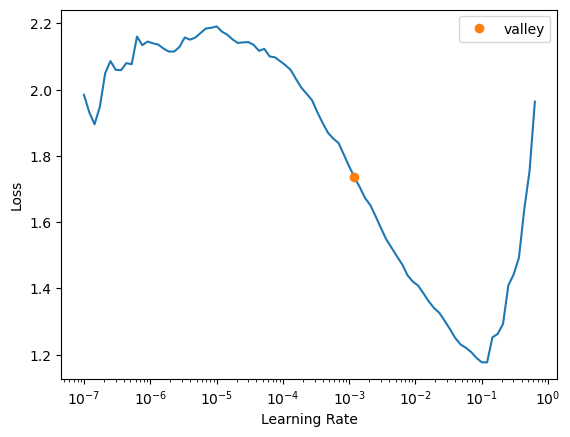

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(18, 0.0012022644514217973)

epoch,train_loss,valid_loss,accuracy,time
0,1.362679,0.500541,0.734483,01:46
1,0.871604,0.279712,0.867241,01:47
2,0.628310,0.195081,0.924138,01:44
3,0.469532,0.144576,0.943103,01:38
4,0.377748,0.107818,0.967241,01:38
5,0.317120,0.084529,0.970690,01:40
6,0.247072,0.069361,0.975862,01:36
7,0.210279,0.054158,0.981034,01:32
8,0.176030,0.046239,0.986207,01:40
9,0.155977,0.036852,0.989655,01:39


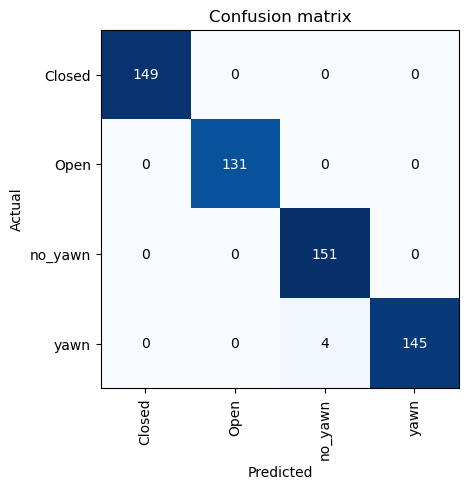

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

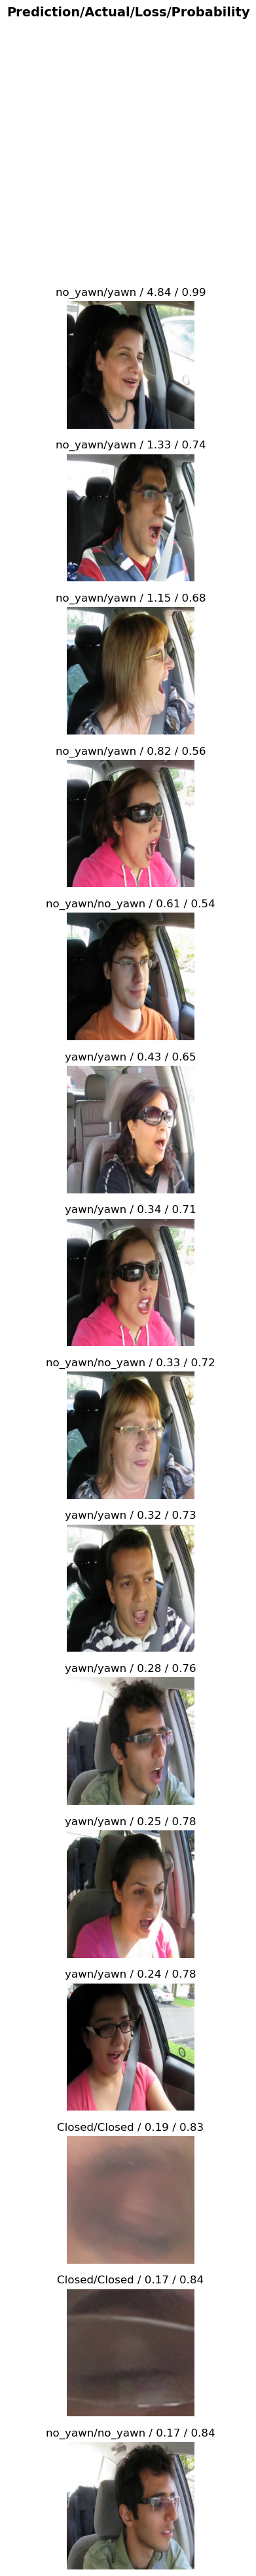

In [11]:
interp.plot_top_losses(15, nrows = 15)

In [12]:
# export the model
learn.export()

In [13]:
learn.predict('/Users/orion/SEP_769/151.jpg')

('no_yawn',
 TensorBase(2),
 TensorBase([8.2086e-08, 1.5650e-08, 9.9256e-01, 7.4358e-03]))

In [ ]:
#load_learner('/Users/orion/export.pkl')